# MS Dhoni : Batting Analysis


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', None)
pd.set_option('max_colwidth', None)

In [2]:
DF=pd.read_csv('IPL_ball_by_ball_updated.csv')
DF.head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Let's consider the data from IPL 2021-2023

In [3]:
df=DF[(DF.season > 2020)]
df.head(6)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
193616,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.1,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193617,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.2,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193618,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.3,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193619,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.4,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193620,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.5,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193621,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.6,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
msdf=df[df.striker=='MS Dhoni']
msdf.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
193959,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,15.2,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193960,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,15.3,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,bowled,MS Dhoni,NaN,NaN
196389,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,13.8,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,C Sakariya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196391,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,14.2,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,R Tewatia,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196392,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,14.3,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,R Tewatia,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
msdf['runs_off_bat'].sum()

450

In [6]:
msdf['ball'].count()

372

In [7]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
193616,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.1,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193617,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.2,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193618,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.3,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193619,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.4,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193620,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.5,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df1=pd.DataFrame(df.groupby('striker')['runs_off_bat'].sum()).reset_index()
df1.head()

,striker,runs_off_bat
0,A Badoni,399
1,A Manohar,222
2,A Mishra,19
3,A Nortje,38
4,A Tomar,4


In [94]:
df2=pd.DataFrame(df.groupby('striker')['ball'].count()).reset_index()
df2.head()

,striker,ball
0,A Badoni,325
1,A Manohar,165
2,A Mishra,30
3,A Nortje,36
4,A Tomar,8


In [10]:
df1.head()
df3=df1.merge(df2,on='striker',how='left')
df3.reset_index( drop = True)
df3=pd.DataFrame(df3)
df3.head()

,striker,runs_off_bat,ball
0,A Badoni,399,325
1,A Manohar,222,165
2,A Mishra,19,30
3,A Nortje,38,36
4,A Tomar,4,8


In [11]:
df3['strike_rate'] = 100*(df3['runs_off_bat']/df3['ball'])
df3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,399,325,122.769231
1,A Manohar,222,165,134.545455
2,A Mishra,19,30,63.333333
3,A Nortje,38,36,105.555556
4,A Tomar,4,8,50.000000


In [96]:
df3=df3[(df3.runs_off_bat>=400)& (df3.strike_rate>=120)]
df3.head()
df3.sort_values('runs_off_bat',ascending = False)

,striker,runs_off_bat,ball,strike_rate
230,Shubman Gill,1851,1371,135.010941
62,F du Plessis,1831,1331,137.565740
188,RD Gaikwad,1593,1183,134.657650
106,KL Rahul,1516,1184,128.040541
84,JC Buttler,1509,1067,141.424555
202,S Dhawan,1420,1150,123.478261
246,V Kohli,1385,1126,123.001776
221,SV Samson,1304,933,139.764202
208,SA Yadav,1225,776,157.860825
67,GJ Maxwell,1214,782,155.242967


#MSD is the 6th lowest scorer over the last 3 seasons :
A valid reason may be lesser number of balls faced by him.
We will compare the rest WK and middle order batters against him

In [13]:
df3.sort_values('strike_rate',ascending = False)

,striker,runs_off_bat,ball,strike_rate
68,H Klaasen,448,262,170.992366
238,TH David,418,249,167.871486
118,LS Livingstone,758,479,158.246347
208,SA Yadav,1225,776,157.860825
35,C Green,452,287,157.491289
67,GJ Maxwell,1214,782,155.242967
91,JM Sharma,543,354,153.389831
7,AD Russell,745,489,152.351738
101,KD Karthik,693,466,148.712446
257,YBK Jaiswal,1132,763,148.361730


# MSD has the lowest Strikerate over the last 3 seasons :
The SR of 120.9677 is really poor for a finisher but let us allow ourself to delve deeper into the data

#MSD over the years:

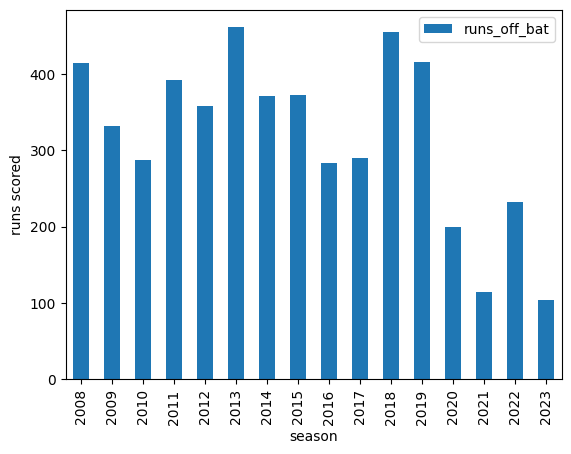

In [14]:
DF=DF[DF.striker=='MS Dhoni']
ms_season=pd.DataFrame(DF.groupby('season')['runs_off_bat'].sum()).plot(kind='bar')
plt.ylabel('runs scored')
plt.show()


# MSD's Runs have dipped significantly which hints that he has not been in his best touch in the last 3 seasons

In [15]:
ms_season1=pd.DataFrame(DF.groupby('season')['runs_off_bat'].sum()).reset_index()
ms_season2=pd.DataFrame(DF.groupby('season')['ball'].count()).reset_index()
ms_season3=ms_season1.merge(ms_season2,on='season',how='left')
ms_season3['strikerate']=100*(ms_season3.runs_off_bat/ms_season3.ball)
ms_season3=pd.DataFrame(ms_season3)
ms_season3

,season,runs_off_bat,ball,strikerate
0,2008,414,319,129.780564
1,2009,332,270,122.962963
2,2010,287,215,133.488372
3,2011,392,247,158.704453
4,2012,358,283,126.501767
5,2013,461,298,154.697987
6,2014,371,258,143.798450
7,2015,372,309,120.388350
8,2016,284,220,129.090909
9,2017,290,261,111.111111


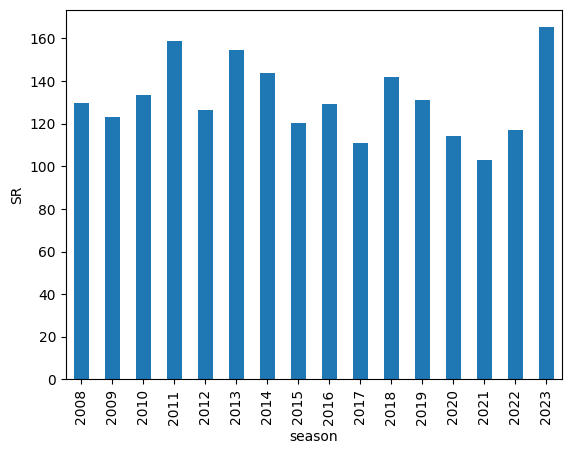

In [16]:
ms_season=ms_season3.groupby(['season'])['strikerate'].sum().plot(kind='bar')
plt.ylabel('SR')
plt.show()

# MSD's Strikerate has increased from 2022 and has hit an all time high in 2023 thus there is still something in him and that certainly played a key role in CSK's winning conquest


#Let us now take a look on the stats of the other WK batsmen who play the role of middle order batters / finishers


In [17]:
dfwk= df3[(df3.striker == 'MS Dhoni') |(df3.striker == 'SV Samson')|(df3.striker == 'RR Pant')|(df3.striker == 'N Pooran')|(df3.striker == 'MS Wade')|(df3.striker == 'JM Bairstow')|(df3.striker == 'JM Sharma')|(df3.striker == 'KD Karthik')|(df3.striker == 'SW Billings')]
dfwk

,striker,runs_off_bat,ball,strike_rate
90,JM Bairstow,501,359,139.554318
91,JM Sharma,543,354,153.389831
101,KD Karthik,693,466,148.712446
140,MS Dhoni,450,372,120.967742
154,N Pooran,749,522,143.486590
193,RR Pant,764,577,132.409012
221,SV Samson,1304,933,139.764202


In [18]:
dfwk.reset_index(drop=True,inplace=True)
dfwk

,striker,runs_off_bat,ball,strike_rate
0,JM Bairstow,501,359,139.554318
1,JM Sharma,543,354,153.389831
2,KD Karthik,693,466,148.712446
3,MS Dhoni,450,372,120.967742
4,N Pooran,749,522,143.486590
5,RR Pant,764,577,132.409012
6,SV Samson,1304,933,139.764202


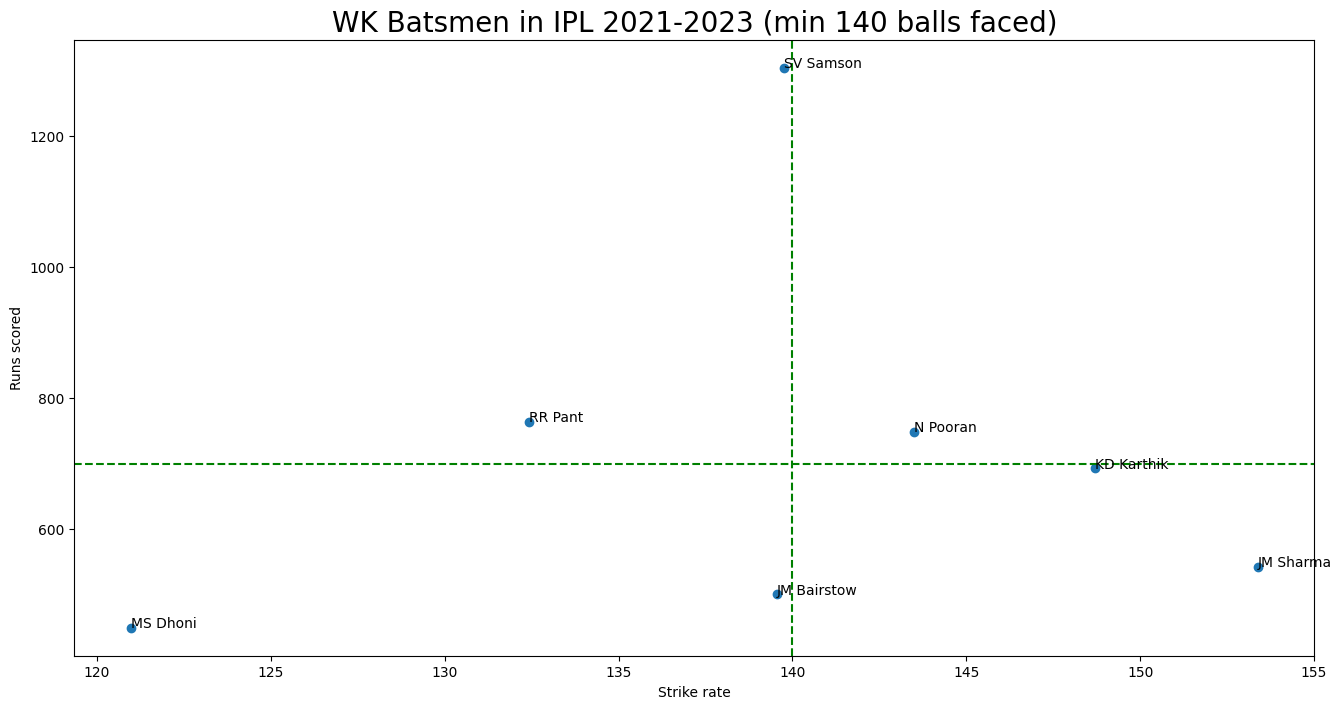

In [19]:
plt.figure(figsize = (16,8))
plt.scatter(dfwk.strike_rate, dfwk.runs_off_bat)
for i in range(len(dfwk)):
    plt.text(dfwk['strike_rate'][i] , dfwk['runs_off_bat'][i]  ,dfwk['striker'][i])


plt.axvline(140, ls = '--', color = 'green')
plt.axhline(700, ls = '--', color = 'green')
plt.title('WK Batsmen in IPL 2021-2023 (min 140 balls faced)', fontsize =20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

# MSD's performance in the recent years is quite unimpressive as compared to the rest of the WKs who bat down the order

# Let's consider his team the CSK and analyze their batters' performance

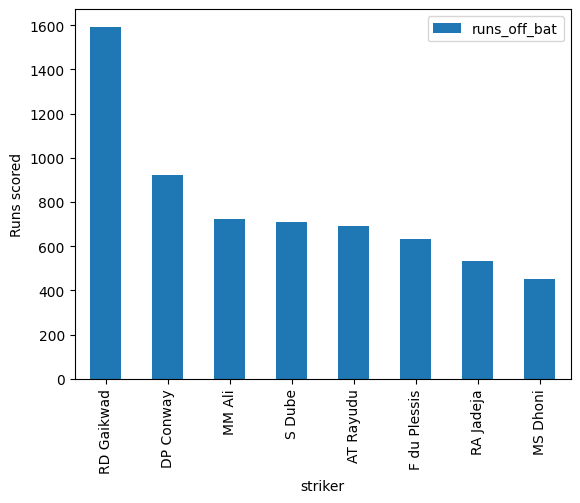

In [20]:
csk_df=df[df.batting_team=='Chennai Super Kings']
csk_runs=pd.DataFrame(csk_df.groupby(['striker'])['runs_off_bat'].sum())
csk_runs=csk_runs[csk_runs.runs_off_bat>400]
csk_runs.sort_values('runs_off_bat',ascending = False).plot(kind='bar')
plt.ylabel("Runs scored")
plt.show()

# If we compare runs scored by MS with that of his teammates:
We must do that only with middle order batters
Still MS has very less runs as compared with other middle order batters since his batting position is at 7 or 8 in recent years. So let's analyse the SR to get the clearer picture

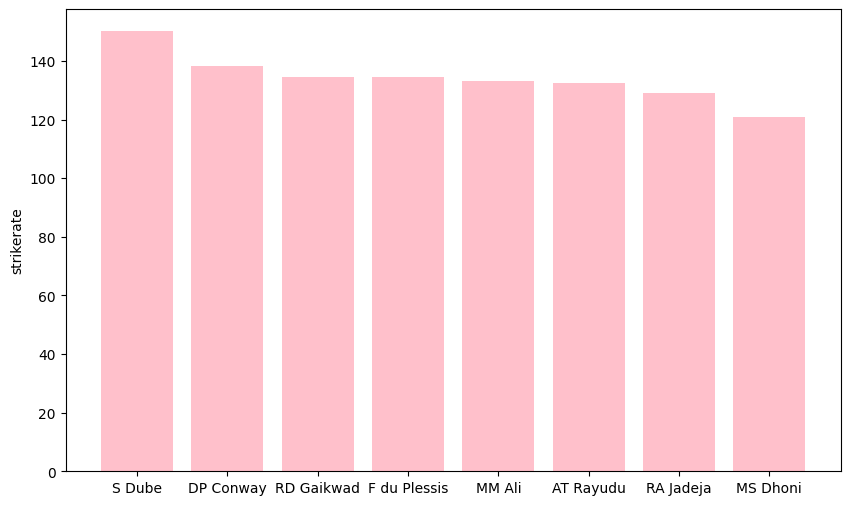

In [21]:
csk_df1=df[df.batting_team=='Chennai Super Kings']
csk_df1=pd.DataFrame(csk_df1.groupby('striker')['ball'].count()).reset_index()
csk_sr=csk_runs.merge(csk_df1,on='striker',how='left')
csk_sr['strikerate']=100*(csk_sr.runs_off_bat/csk_sr.ball)
csk_sr=pd.DataFrame(csk_sr)
csk_sr=csk_sr.sort_values('strikerate',ascending = False)
plt.figure(figsize=(10, 6))
plt.bar(csk_sr['striker'], csk_sr['strikerate'], color='pink')
plt.ylabel('strikerate')
plt.show()

# MSD's SR is considerably lower than his teammates as well


# Let's Focus on his hitting abilities in the death overs

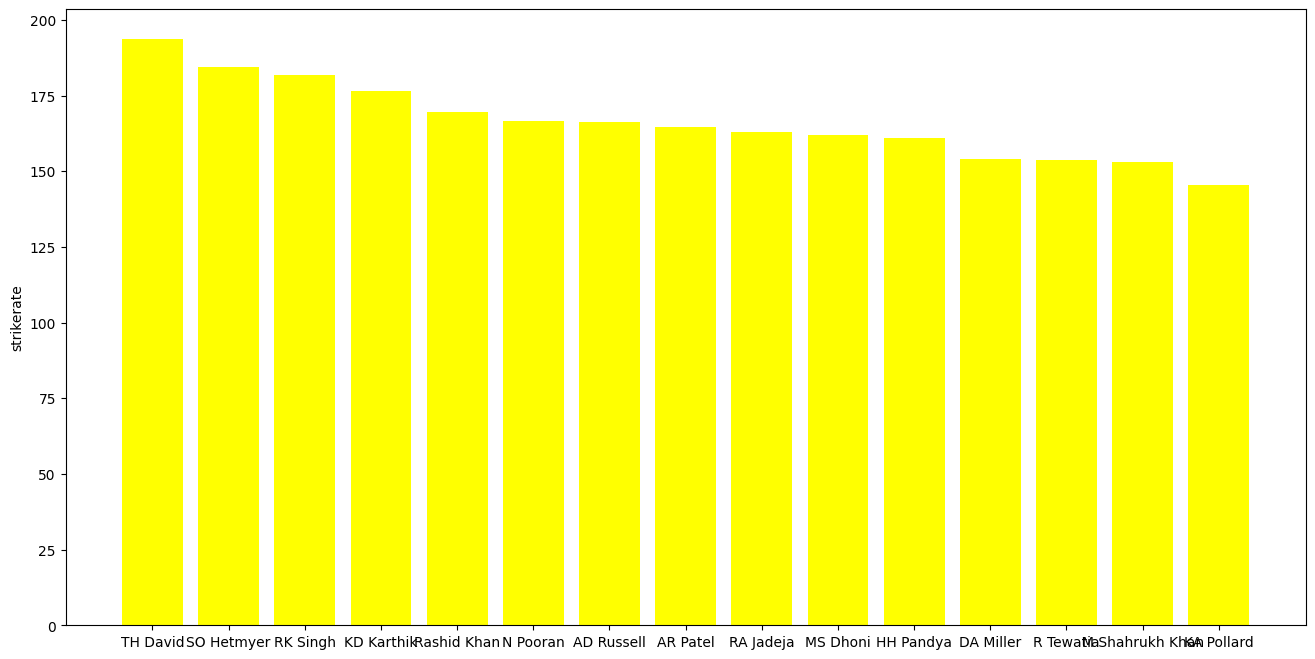

In [22]:
death_df= df[df.ball>=16]
death_df.head()
d1=pd.DataFrame(death_df.groupby(['striker'])['runs_off_bat'].sum()).reset_index()
d2=pd.DataFrame(death_df.groupby(['striker'])['ball'].count()).reset_index()
d3=d1.merge(d2,on='striker',how='left')
d3['strikerate']=100*(d3.runs_off_bat/d3.ball)
d3=d3[d3.ball>140]
d3=pd.DataFrame(d3).reset_index()
plt.figure(figsize=(16, 8))
d3=d3.sort_values('strikerate',ascending = False)
plt.bar(d3['striker'], d3['strikerate'], color='yellow')
# d3.plot(kind='bar')
# d3=d3.sort_values('strikerate',ascending = False).groupby(['striker'])['strikerate'].sum().plot(kind='bar')
plt.ylabel('strikerate')
plt.show()





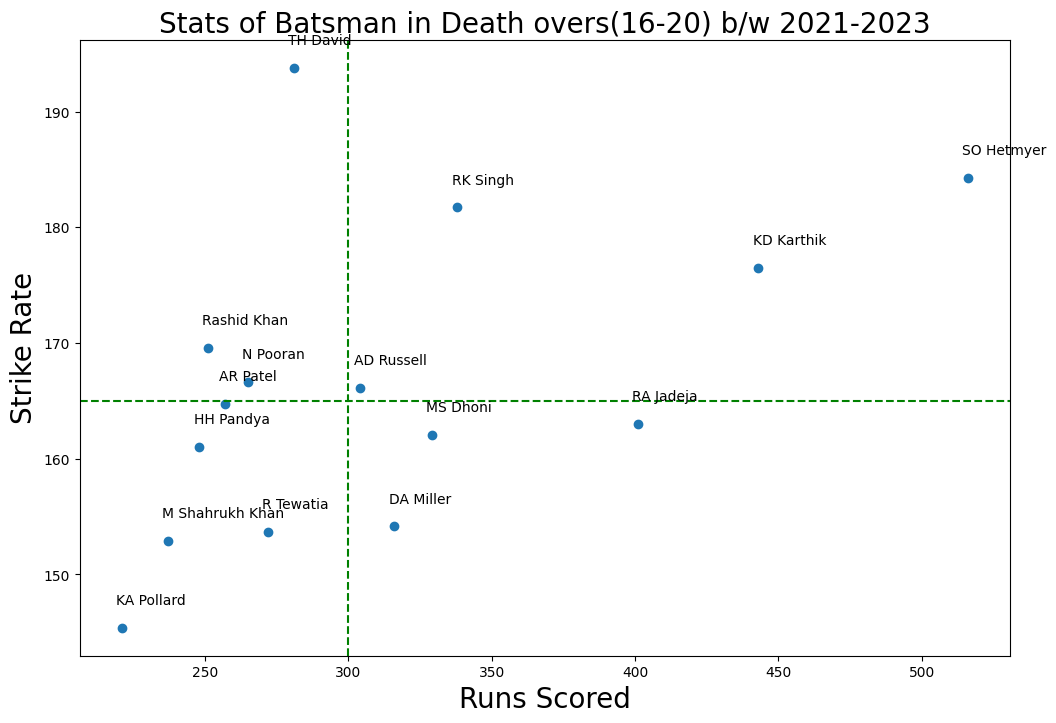

In [23]:
plt.figure(figsize = (12,8))
plt.scatter(d3.runs_off_bat , d3.strikerate)

for i in range(len(d3)):
    plt.text(d3['runs_off_bat'][i] -2, d3['strikerate'][i] +2, d3['striker'][i])

plt.title('Stats of Batsman in Death overs(16-20) b/w 2021-2023', fontsize = 20)
plt.axvline(300, ls = '--' , color = 'green')
plt.axhline(165, ls = '--' , color = 'green')
plt.xlabel('Runs Scored', fontsize =20)
plt.ylabel('Strike Rate', fontsize=20)
plt.show()

# As we can see from this data : MS is still better than some of the established modern day finishers


# CSK is a franchise known for its backing for experienced players and this is the stat they might have considered: Striking ability

In [83]:
bd_count=pd.DataFrame(death_df.groupby(['striker'])['ball'].count()).reset_index()
boundary_hits = death_df[death_df['runs_off_bat'].isin([4, 6])]
boundary_hits.head()
bd_count1=pd.DataFrame(boundary_hits.groupby(['striker'])['runs_off_bat'].count()).reset_index()
bd_df=bd_count1.merge(bd_count,on='striker',how='left')
bd_df=pd.DataFrame(bd_df)
bd_df=bd_df.rename(columns={'runs_off_bat':'boundaries_hit'})
bd_df=bd_df[bd_df.boundaries_hit>35]
bd_df['balls_per_boundary']=(bd_df.ball/bd_df.boundaries_hit)
bd_df.sort_values('balls_per_boundary',ascending=True)
bd_df.reset_index(drop=True,inplace=True)
bd_df

,striker,boundaries_hit,ball,balls_per_boundary
0,AD Russell,48,183,3.812500
1,DA Miller,41,205,5.000000
2,GJ Maxwell,39,129,3.307692
3,KD Karthik,65,251,3.861538
4,MP Stoinis,36,128,3.555556
5,MS Dhoni,49,203,4.142857
6,N Pooran,37,159,4.297297
7,R Tewatia,38,177,4.657895
8,RA Jadeja,51,246,4.823529
9,RK Singh,51,186,3.647059


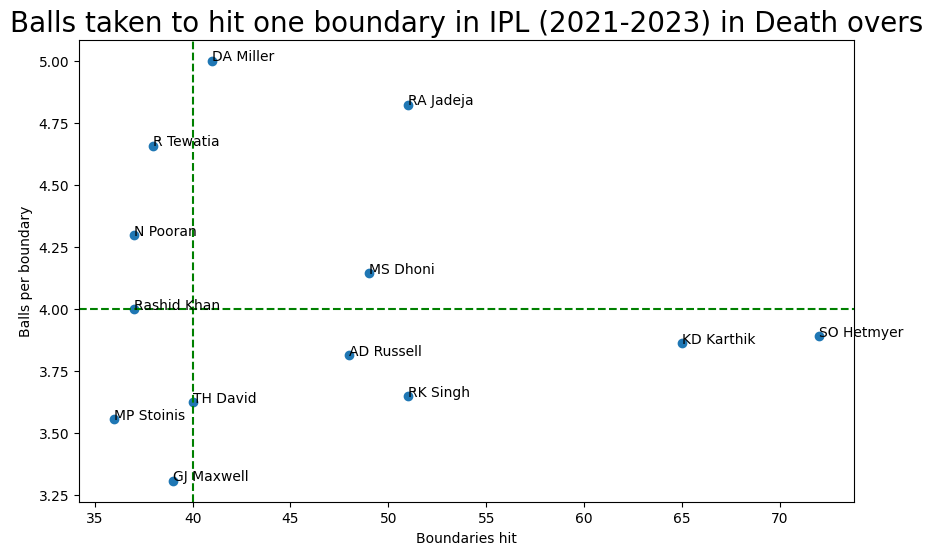

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(bd_df.boundaries_hit,bd_df.balls_per_boundary)

for i in range(len(bd_df)):
  # if bd_df['striker'][i] == 'MS Dhoni':
  #   plt.text(bd_df['boundaries_hit'][i]-13, bd_df['balls_per_boundary'][i], bd_df['striker'][i])
  # elif bd_df['striker'][i] == 'AR Patel':
  #   plt.text(bd_df['boundaries_hit'][i] -5, bd_df['balls_per_boundary'][i]+0.025, bd_df['striker'][i])
  # elif bd_df['striker'][i] == 'R Tewatia':
  #   plt.text(bd_df['boundaries_hit'][i] +7, bd_df['balls_per_boundary'][i], bd_df['striker'][i])
  # elif bd_df['striker'][i] == 'C Green':
  #   plt.text(bd_df['boundaries_hit'][i] +7, bd_df['balls_per_boundary'][i]+0.01, bd_df['striker'][i])
  # elif bd_df['striker'][i] == 'TH David':
  #   plt.text(bd_df['boundaries_hit'][i] , bd_df['balls_per_boundary'][i]-0.12, bd_df['striker'][i])
  # elif bd_df['striker'][i] == 'JM Bairstow':
  #   plt.text(bd_df['boundaries_hit'][i] +5, bd_df['balls_per_boundary'][i], bd_df['striker'][i])
  # else:
    plt.text(bd_df['boundaries_hit'][i],bd_df['balls_per_boundary'][i],bd_df['striker'][i])

plt.title("Balls taken to hit one boundary in IPL (2021-2023) in Death overs",fontsize=20)
plt.axvline(40,ls='--',color='green')
plt.axhline(4,ls='--',color='green')
plt.xlabel('Boundaries hit')
plt.ylabel('Balls per boundary')
plt.show()




The players in the 4th Quadrant are way better than others


#The Balls taken to hit a boundary (min 40 boundaries) in the death overs tells a very interesting story : MSD lags behind the established finishers like Tim David , Russell, DK,Hetmyer and Rinku Singh however he is still better than Hardik Pandya,Pooran,Tewatia,Miller and Jadeja(his teammate).

# Conclusion  : MS Dhoni might not seem to be an ideal wk and finisher currently but by taking a closer look of the CSK team he is still there best bet as he is still performing better than some of the established players of the game and if we add his presence on the field while they are grooming a young captain in Ruturaj Gaikwad, he is an invalueable asset. Also, if CSK chases a targer then usually by the impact player rule they have a luxury of an extra batter thus this allows them to have MSD in the last 2 overs which gives him the freedom to bat and that is his best use.
#      "I would like to think that Dhoni playing for just 8-10 balls allows him to play with absolute freedom. It tends to work in your favour as well as opposed to playing 25-30 balls where you will be expected to build your innings”, said Gautam Gambhir , mentor of the KKR. Thus, if MSD can create that impact in such a short period, that is good for CSK. Other teams will have a different strategy but for CSK this has been the plan for the last 3-4 years.